<a href="https://colab.research.google.com/github/Abhishekdileep/Machine-Learning-Collection/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST Dataset using ANN
- We flatten out the input here without using any convolution
- We use no RGB related data from the kernel
- No sptial Invaraince and Local Continuity

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout , Activation , Conv2D , MaxPooling2D
from keras.utils import np_utils , to_categorical
from keras.callbacks import Callback

from keras.datasets import mnist

import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train ) , (X_test , y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/ 255

In [ ]:
Y_train = np_utils.to_categorical(y_train , 10 )
Y_test = np_utils.to_categorical(y_test , 10)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [ ]:
model.fit(X_train , Y_train , batch_size=32 , epochs = 10 , verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2955 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1436 - accuracy: 0.9564
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0875 - accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0758 - accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0667 - accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0583 - accuracy: 0.9810
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0542 - accuracy: 0.9819
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0478 - accuracy: 0.9837
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [ ]:
score = model.evaluate(X_test, Y_test , verbose = 1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0750 - accuracy: 0.9769


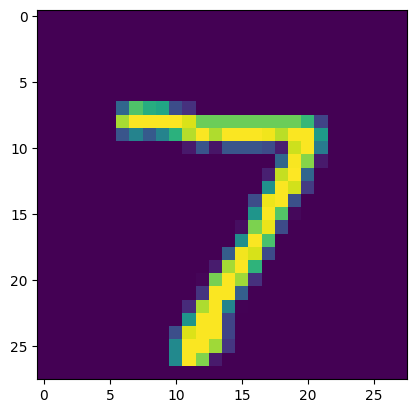

In [ ]:
plt.imshow(X_test[0])

In [ ]:
from numpy import argmax
X_test0 = X_test[0].reshape(-1,28,28)
prediction = model.predict(X_test0)
predicted_class = argmax(prediction)
print(predicted_class)

1/1 [==============================] - 0s 198ms/step
7


### Convolution Neural Network Based Approach
- We are using Kernels and all
- the activation Function is Relu
- Each block consist of CNN model followed by RELU activation followed by Max pooling
- Flatten Layer at the end of the model with softmax classfier

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

#input image dimensions
img_x , img_y = 28 , 28
input_shape=(img_x , img_y , 1)

In [ ]:
(X_train, y_train ) , (X_test , y_test) = mnist.load_data()

x_train = X_train.reshape(X_train.shape[0] , img_x , img_y , 1)
x_test = X_test.reshape(X_test.shape[0] , img_x , img_y , 1 )

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

View Pre-processed Data

In [ ]:
print('x_train shape : ' , x_train.shape)
print(x_train.shape[0], 'train_samples')
print(x_test.shape[0], 'test samples')


x_train shape :  (60000, 28, 28, 1)
60000 train_samples
10000 test samples


Convert 1-D class arrays to 10-D class matrices and view the result

In [ ]:
#convert class vectors to binary class matrices : this is for use in the
# categorical crossentropy loss below

y_train = to_categorical(y_train , num_classes)
y_test = to_categorical(y_test , num_classes)

In [ ]:
def baseline_model():
  model = Sequential()
  model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, kernel_size=(5,5) , activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(num_classes , activation='softmax'))

  model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
  return model

In [ ]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
hist_model = model.fit(x_train, y_train , batch_size = 32 , epochs =10 )

Epoch 1/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0120 - accuracy: 0.9964
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0086 - accuracy: 0.9972
Epoch 4/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.0073 - accuracy: 0.9977
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0057 - accuracy: 0.9980
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0046 - accuracy: 0.9985
Epoch 8/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0052 - accuracy: 0.9982
Epoch 9/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0049 - accuracy: 0.9984
Epoch 10/10
1875/1875 [==============================] - 66s 35m

In [ ]:
model1 = baseline_model()
hist_model1 = model1.fit(x_train, y_train , batch_size = 128  , epochs =10 , verbose =1 , validation_data=(x_test , y_test) )

Epoch 1/10
469/469 [==============================] - 62s 130ms/step - loss: 0.2207 - accuracy: 0.9387 - val_loss: 0.0559 - val_accuracy: 0.9829
Epoch 2/10
469/469 [==============================] - 63s 135ms/step - loss: 0.0574 - accuracy: 0.9826 - val_loss: 0.0421 - val_accuracy: 0.9859
Epoch 3/10
469/469 [==============================] - 62s 131ms/step - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0398 - val_accuracy: 0.9861
Epoch 4/10
469/469 [==============================] - 62s 132ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0320 - val_accuracy: 0.9895
Epoch 5/10
469/469 [==============================] - 61s 131ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0288 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 63s 135ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0253 - val_accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 63s 135ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0321 - val_ac

In [ ]:
def evaluate_model(model, model_log):
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss : ', score[0])
  print('Test Accuracy:' , score[1])

  print('Train Loss:' ,model_log.history['loss'][-1])
  print('Train Accuracy:' , model_log.history['accuracy'][-1])
  print('Test Loss:' , model_log.history['val_loss'][-1])
  print('Test Accuracy' , model_log.history['val_accuracy'][-1])

